### Regression Task

1. import nessary libraries

In [1]:
# import all need libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2. load dataset

In [10]:
# loading dataset using pandas
dataset_dir = "../../dataset/Ecommerce Customers.csv"
df = pd.read_csv(dataset_dir)

In [ ]:
# inspect top 5 rows
df.head()

3. Exploratory data analysis

In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


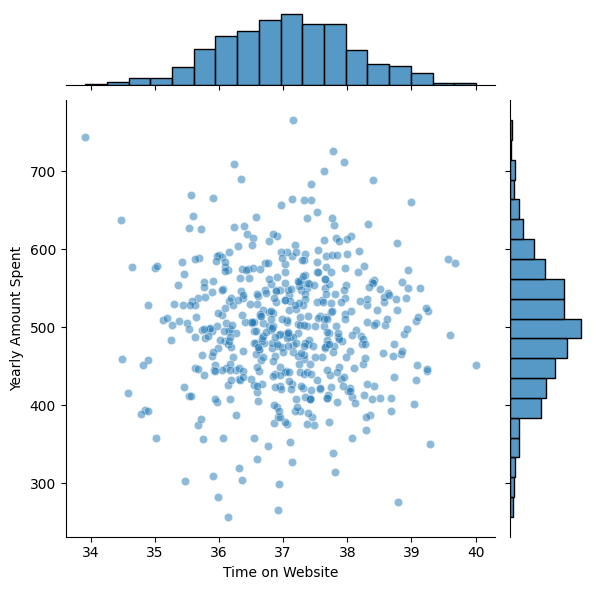

In [3]:
# EDA session
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, alpha=0.5)

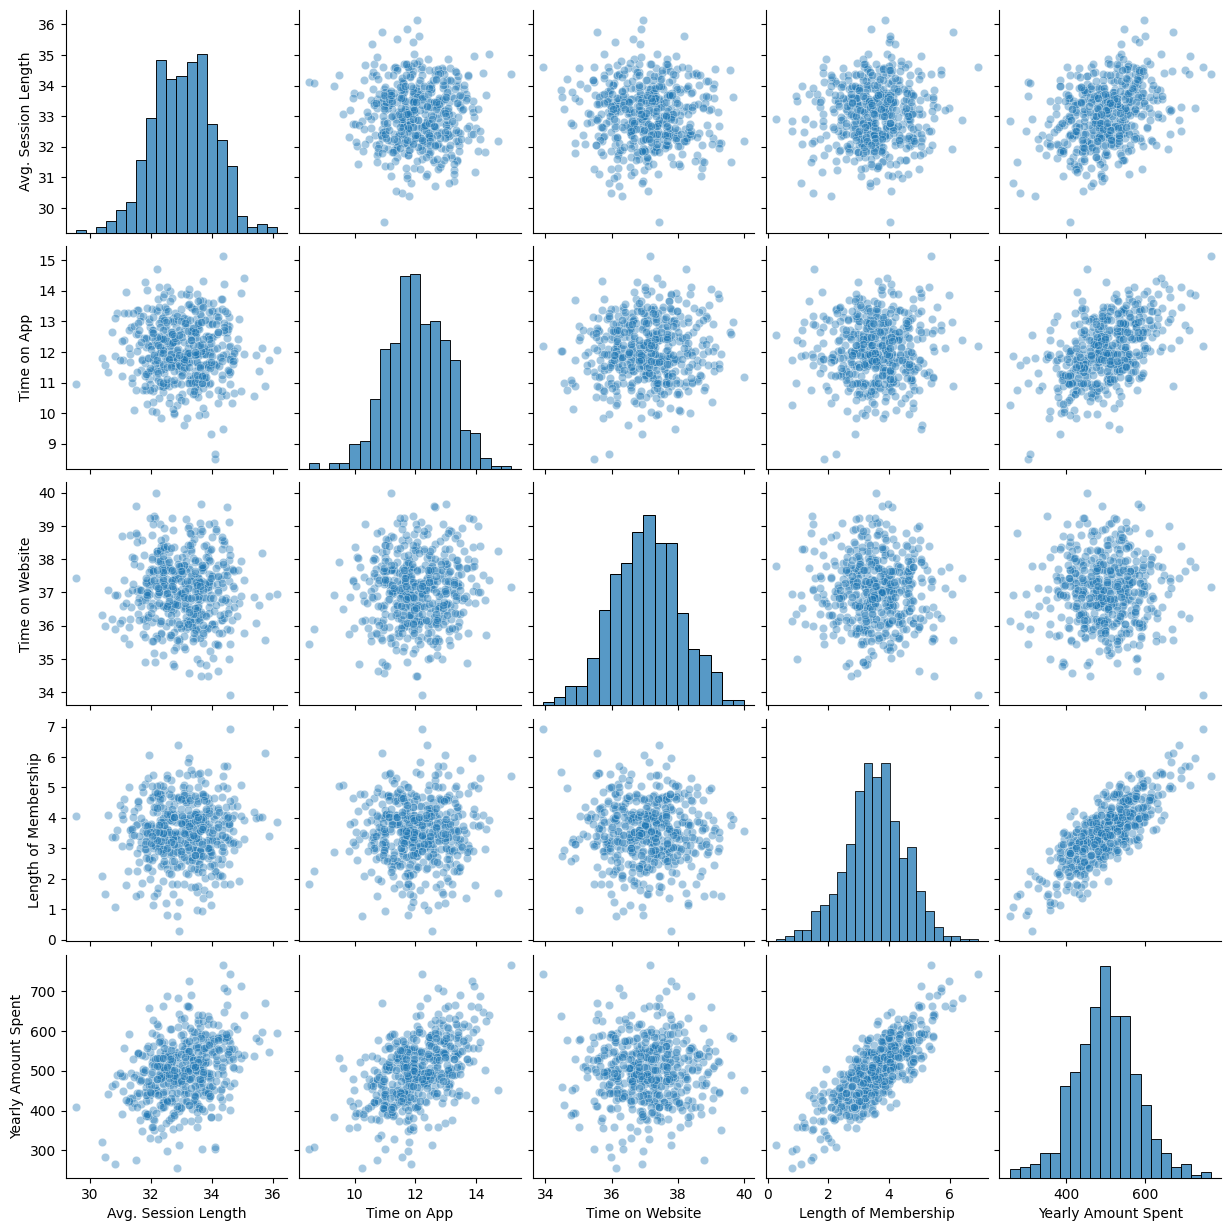

In [4]:
# pairplot display all property
sns.pairplot(df, kind="scatter", plot_kws={'alpha': 0.4})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nomarlizzed = pd.DataFrame(scaler.fit_transform(data))

In [7]:
# Apply Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nomarlizzed = pd.DataFrame(
    scaler.fit_transform(
        df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']]), 
        columns=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']
        )

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(scaler.fit_transform(
        df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']])), 
        columns=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']
        )

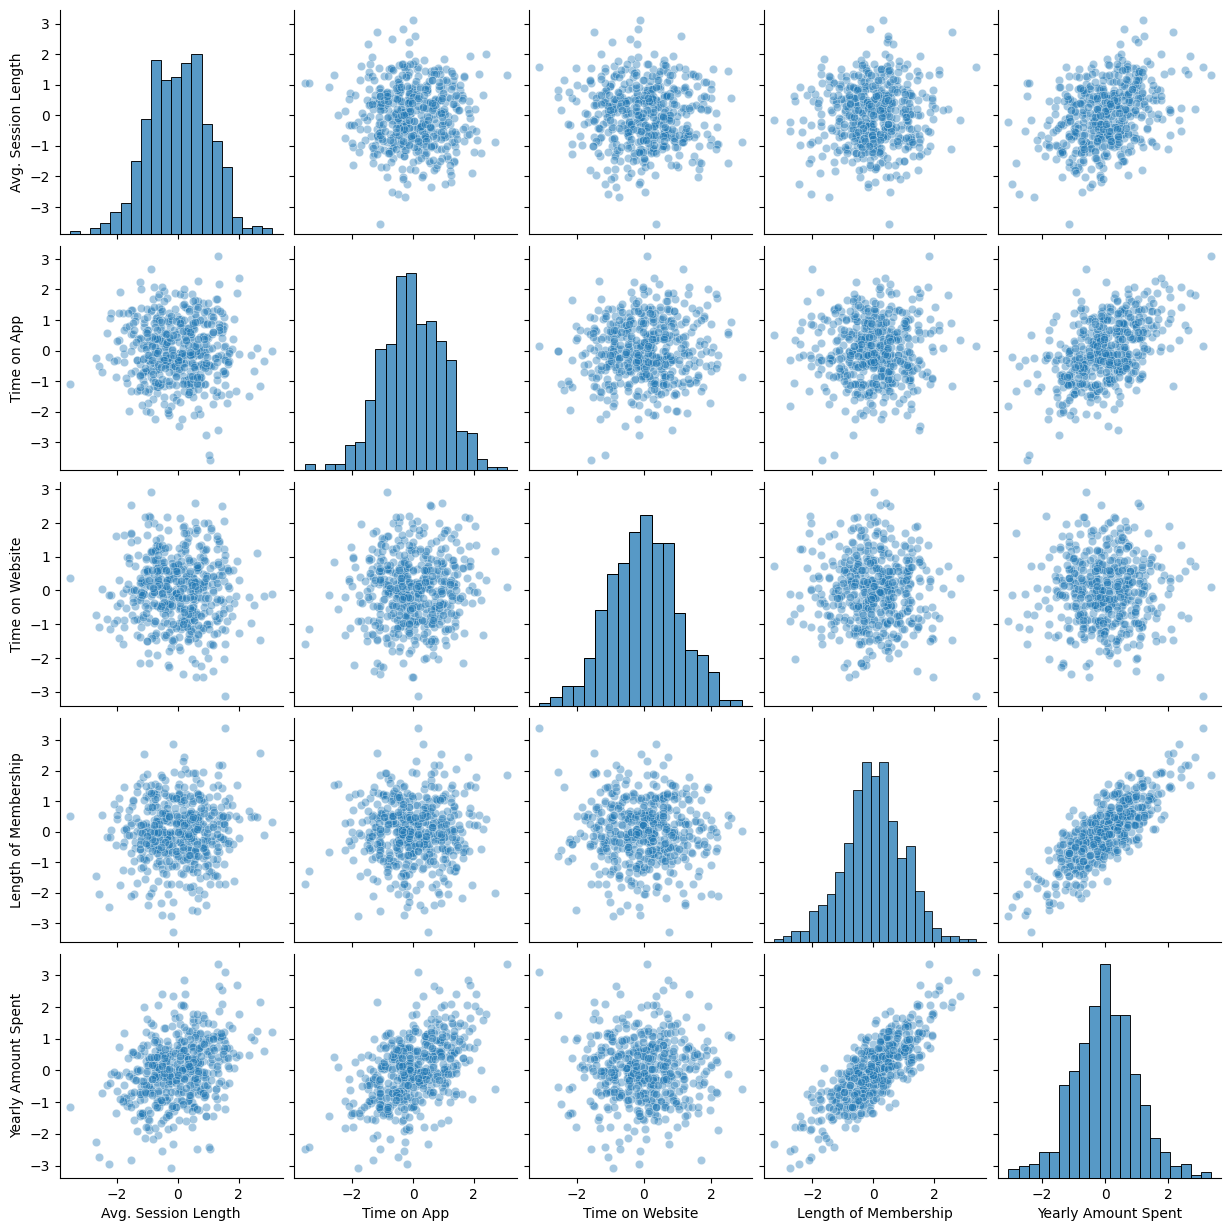

In [18]:
sns.pairplot(X_standardized, kind="scatter", plot_kws={'alpha': 0.4})

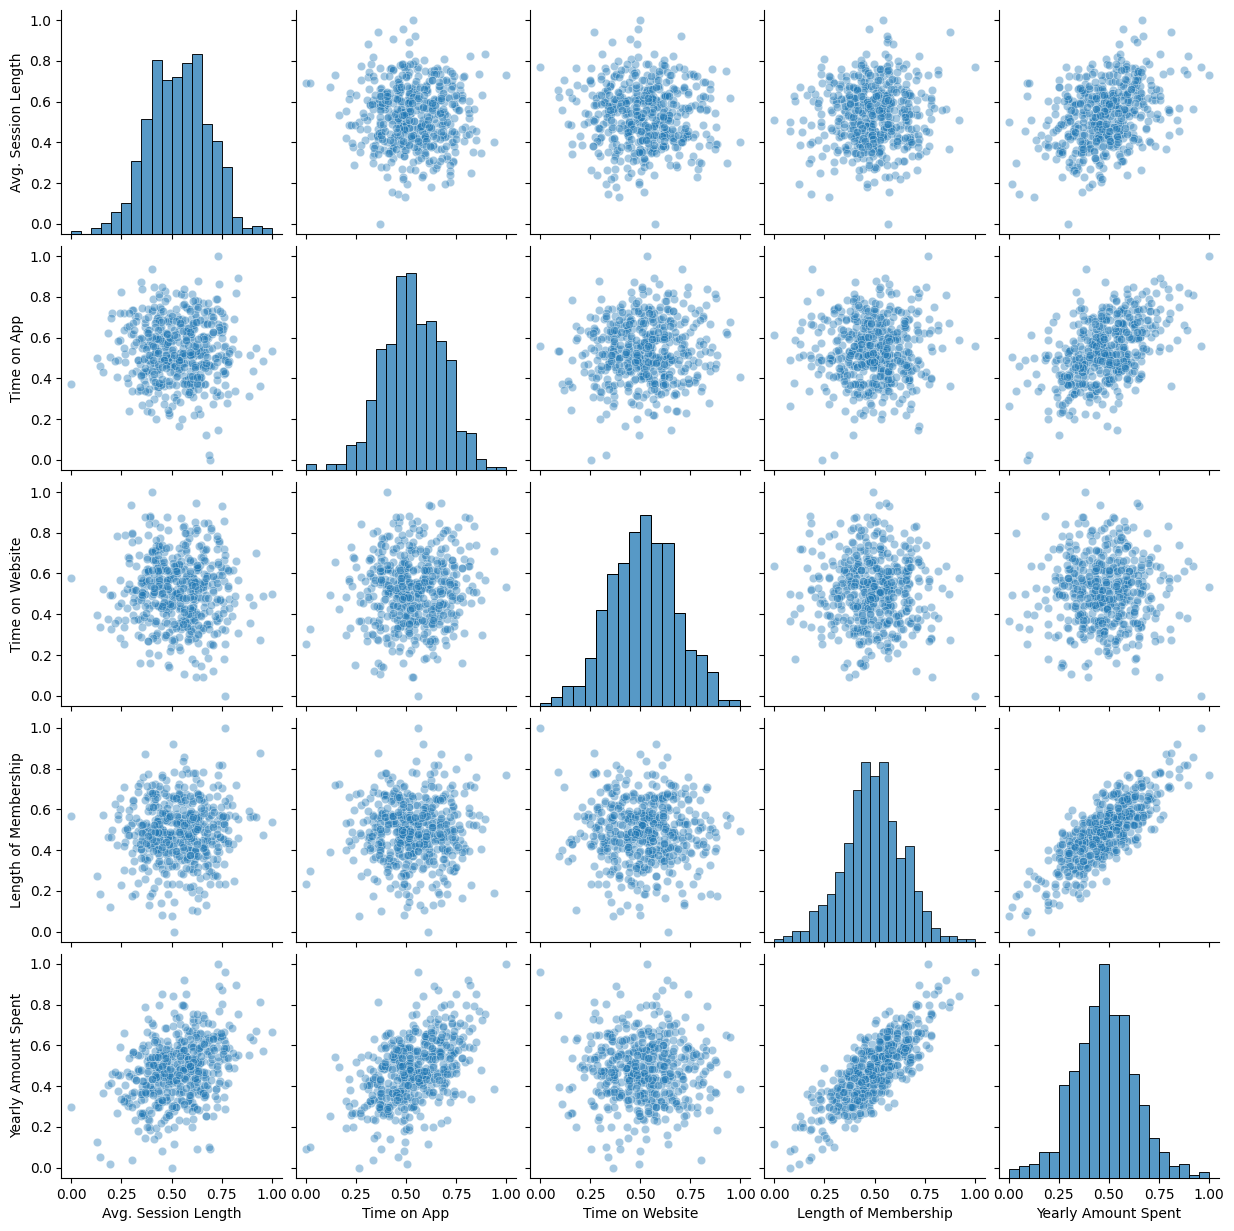

In [8]:
# pairplot display all property
sns.pairplot(nomarlizzed, kind="scatter", plot_kws={'alpha': 0.4})

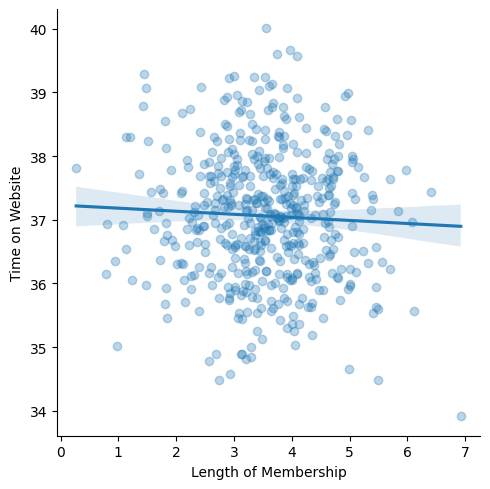

In [5]:
# draw best fit linear regression line on data
sns.lmplot(x='Length of Membership', y='Time on Website', data=df, scatter_kws={'alpha': 0.3})

In [19]:
# define X and Y
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df[['Yearly Amount Spent']]

4. Data splitting

In [20]:
# splitting dataset using scikit learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5. Define Model & Training

In [21]:
# Initialize the LinearRegression model
lm = LinearRegression()
# training
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
# checking coefficient of linear model
lm.coef_

In [22]:
# mapping coefficient to label
coef_mapping = pd.DataFrame(lm.coef_[0], X.columns, columns=['Coef'])
print(coef_mapping)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


6. Prediction

In [ ]:
# prediction first record of test data
lm.predict([X_test.iloc[0]])

In [25]:
# convert y_test to suitable dataframe
Y_test = pd.DataFrame(y_test.to_numpy(), columns=["prediction"])

In [23]:
# making prediction with all testing dataset
predictions = lm.predict(X_test)

In [26]:
# combine ground true with prediction
predictions_df = pd.concat([pd.DataFrame(predictions, columns=['Actual']), Y_test], axis=1)

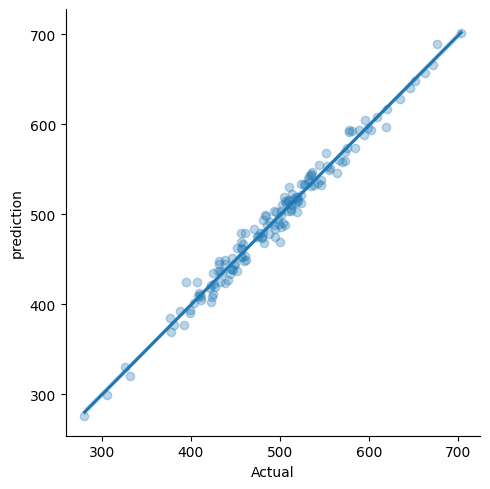

In [27]:
# plot prediction with ground true
sns.lmplot(x='Actual', y='prediction', data=predictions_df, scatter_kws={'alpha': 0.3})

7. Evaluating model using the discussed metrics

In [ ]:
# discussed metrics using scikit learn

from sklearn.metrics import mean_squared_error, mean_absolute_error

print("mean_squared_error: ", mean_squared_error(y_test.to_numpy(), predictions))
print("mean_absolute_error: ", mean_absolute_error(y_test, predictions))


#### Classification Task

In [30]:
iris_dir = "../../dataset/Iris.csv"
iris_df = pd.read_csv(iris_dir)

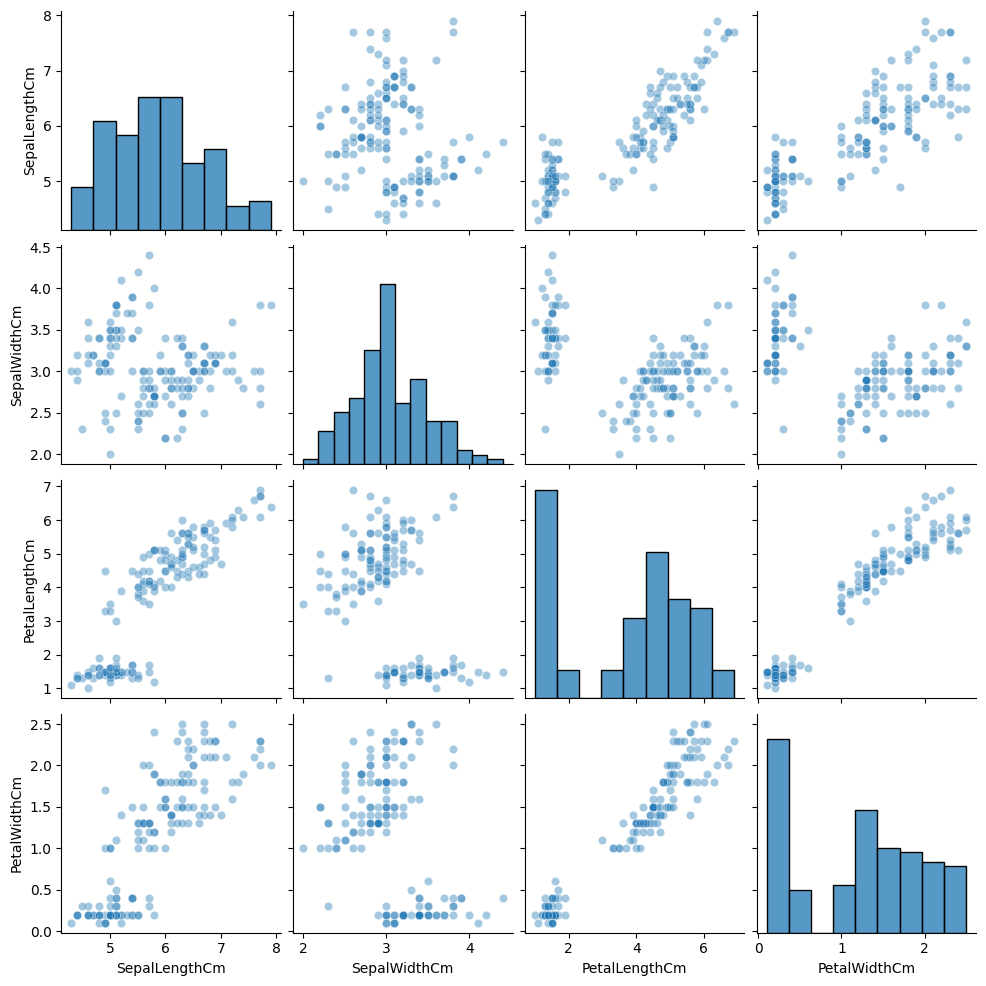

In [40]:
sns.pairplot(iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], 
             kind="scatter", 
             plot_kws={'alpha': 0.4})

In [36]:
iris_df.head(-5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica


In [43]:
# Display 5 records of each species
sample_per_species = iris_df.groupby('Species').apply(lambda x: x.head(2))

# Reset index if needed
sample_per_species = sample_per_species.reset_index(drop=True)

print(sample_per_species)

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0    1            5.1           3.5            1.4           0.2   
1    2            4.9           3.0            1.4           0.2   
2   51            7.0           3.2            4.7           1.4   
3   52            6.4           3.2            4.5           1.5   
4  101            6.3           3.3            6.0           2.5   
5  102            5.8           2.7            5.1           1.9   

           Species  
0      Iris-setosa  
1      Iris-setosa  
2  Iris-versicolor  
3  Iris-versicolor  
4   Iris-virginica  
5   Iris-virginica  


C:\Users\User\AppData\Local\Temp\ipykernel_15880\2931123938.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_per_species = iris_df.groupby('Species').apply(lambda x: x.head(2))


In [41]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [44]:
# define X and Y
X_Iris = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_Iris = iris_df[['Species']]

In [45]:
# splitting dataset using scikit learn
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_Iris, y_Iris, test_size=0.3, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model_iris = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_iris.fit(X_iris_train, y_iris_train)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [43]:
X_iris_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [34]:
# Make predictions
y_pred = model_iris.predict(X_iris_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_iris_test, y_pred)
report = classification_report(y_iris_test, y_pred)
conf_matrix = confusion_matrix(y_iris_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [48]:
# Save the model if needed
import joblib
joblib.dump(model_iris, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [1]:
# load the model was trained
import joblib
model = joblib.load('./random_forest_model.pkl')

testing_1 = [[6.1,	2.8,	4.7,	1.2]]
prediction = model.predict(testing_1)
print(prediction)

['Iris-versicolor']


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
